In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# Charger le dataset
file_path = 'crop_yield_cleaned.csv'
data = pd.read_csv(file_path)

In [3]:
# Vérification des données
print(data.head())

           Crop  Crop_Year             Season  State     Area  Production  \
0      Arecanut       1997      Toute l'année  Dakar  73814.0       56708   
1     Arhar/Tur       1997  Saison des Pluies  Dakar   6637.0        4685   
2   Castor seed       1997  Saison des Pluies  Dakar    796.0          22   
3      Coconut        1997      Toute l'année  Dakar  19656.0   126905000   
4  Cotton(lint)       1997  Saison des Pluies  Dakar   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [4]:
# Affiche le nombre de lignes et de colonnes
rows, cols = data.shape
print(f"Nombre de lignes : {rows}")
print(f"Nombre de colonnes : {cols}")

Nombre de lignes : 17691
Nombre de colonnes : 10


In [5]:
# Affiche le type de chaque colonne et le nombre de valeurs manquantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17691 entries, 0 to 17690
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             17691 non-null  object 
 1   Crop_Year        17691 non-null  int64  
 2   Season           17691 non-null  object 
 3   State            17691 non-null  object 
 4   Area             17691 non-null  float64
 5   Production       17691 non-null  int64  
 6   Annual_Rainfall  17691 non-null  float64
 7   Fertilizer       17691 non-null  float64
 8   Pesticide        17691 non-null  float64
 9   Yield            17691 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.3+ MB
None


In [6]:
# Statistiques descriptives des colonnes numériques
print(data.describe())

          Crop_Year          Area    Production  Annual_Rainfall  \
count  17691.000000  1.769100e+04  1.769100e+04     17691.000000   
mean    2009.010966  1.754831e+05  1.824050e+07      1433.943494   
std        6.507689  7.393602e+05  2.774568e+08       836.479944   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2003.000000  1.308000e+03  1.317500e+03       927.500000   
50%     2009.000000  8.505000e+03  1.212900e+04      1220.500000   
75%     2015.000000  7.317150e+04  1.135065e+05      1648.200000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.769100e+04  1.769100e+04  17691.000000  
mean   2.346031e+07  4.765266e+04     88.573514  
std    9.520970e+07  2.157593e+05    926.151538  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.759665e+05  3.360000e+02      0.590646  
50%    1.115581e+06  2.250990e+03      1.001429  
75%    9.651987e+06  1.919369e+04    

In [7]:
# Affiche les valeurs uniques pour chaque colonne catégorielle
for column in data.select_dtypes(include='object').columns:
    print(f"\n{column} :\n", data[column].value_counts())



Crop :
 Crop
Maize                    753
Rice                     648
Urad                     613
Sugarcane                582
Moong(Green Gram)        582
Groundnut                574
Sesamum                  556
Potato                   548
Wheat                    527
Rapeseed &Mustard        510
Arhar/Tur                503
Gram                     490
Jowar                    475
Bajra                    472
Small millets            468
Cotton(lint)             460
Onion                    401
Dry chillies             390
Ragi                     383
Other Kharif pulses      382
Sunflower                378
Peas & beans (Pulses)    362
Tobacco                  351
Other  Rabi pulses       349
Soyabean                 347
Horse-gram               335
Turmeric                 334
Masoor                   324
Ginger                   319
Linseed                  308
Castor seed              300
Barley                   297
Sweet potato             271
Garlic                   250


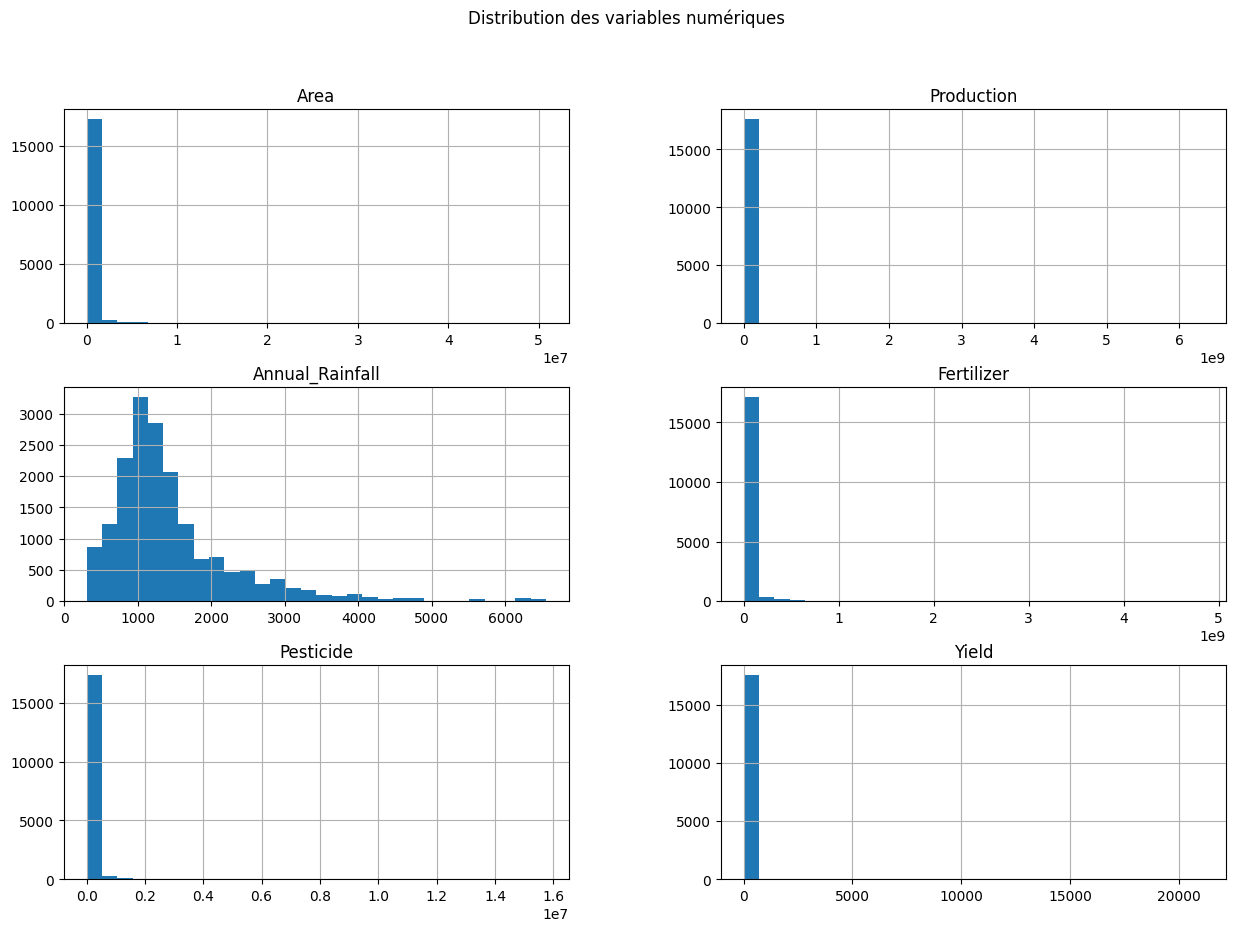

In [22]:
# Distribution de chaque variable numérique
data[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].hist(bins=30, figsize=(15, 10))

plt.suptitle("Distribution des variables numériques")
plt.show()


C:\Users\WANE\AppData\Local\Temp\ipykernel_16464\3651606310.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Crop_Year', y='Yield', ci=None)


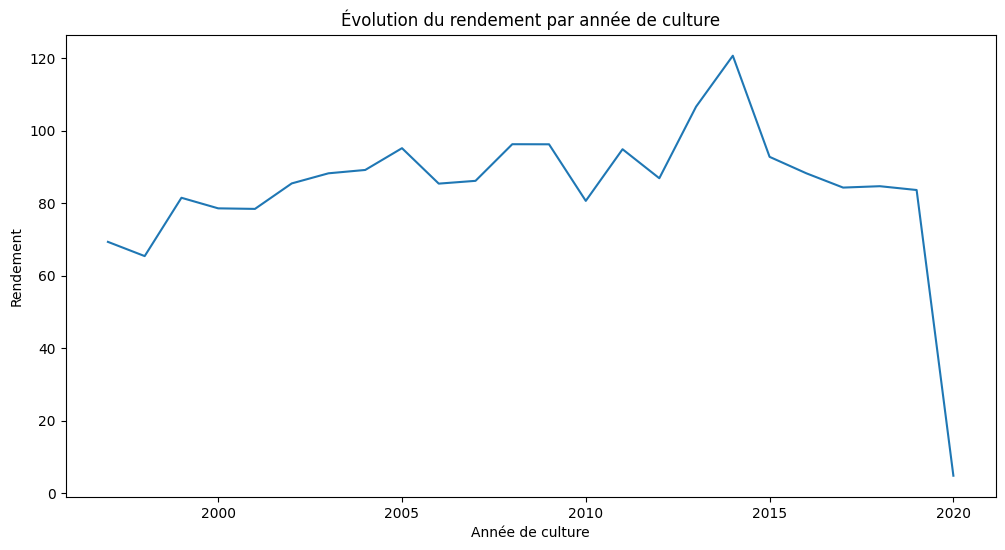

In [9]:
#Visualiser comment le rendement agricole a évolué au fil des années peut donner un aperçu des tendances ou des effets climatiques sur la production.

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Crop_Year', y='Yield', ci=None)
plt.title("Évolution du rendement par année de culture")
plt.xlabel("Année de culture")
plt.ylabel("Rendement")
plt.show()


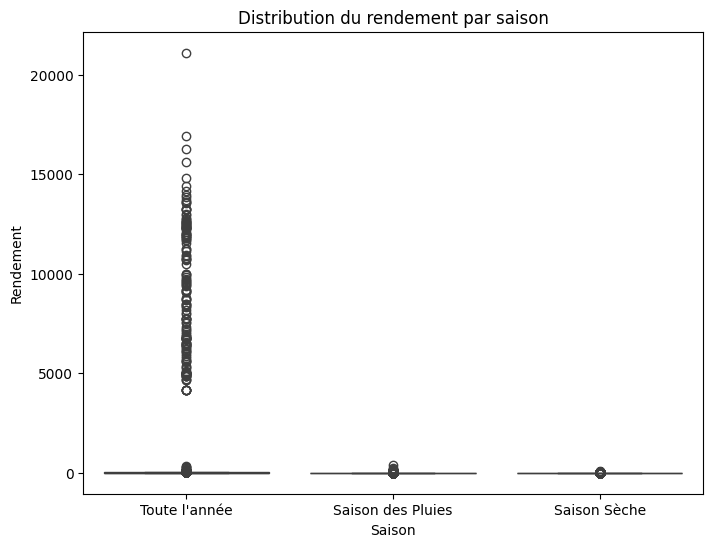

In [10]:
#Comparer le rendement moyen selon la saison permet de voir s'il existe des saisons plus propices à un rendement élevé.and
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Season', y='Yield')
plt.title("Distribution du rendement par saison")
plt.xlabel("Saison")
plt.ylabel("Rendement")
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

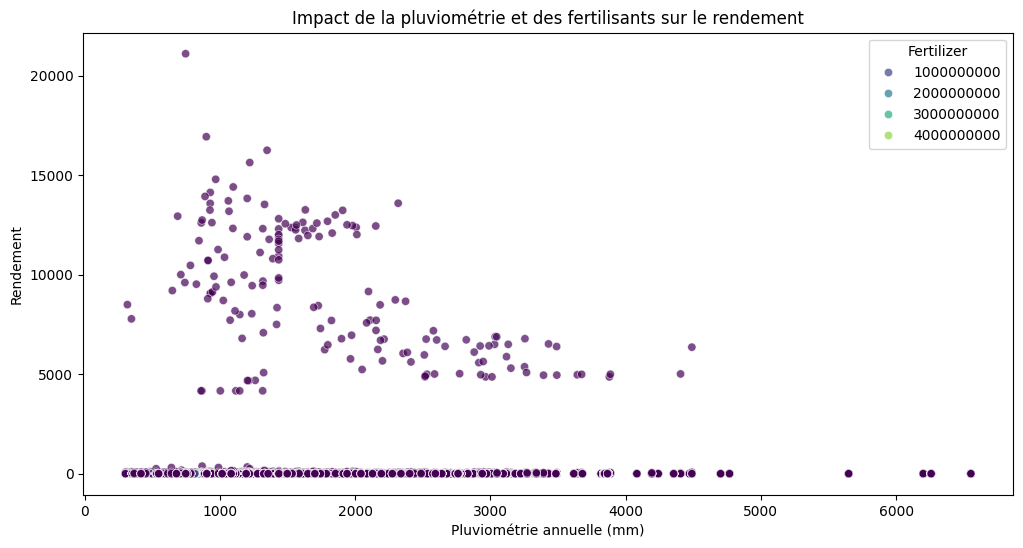

In [11]:
# Influence de la Pluviométrie et des Fertilisants sur le Rendement
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Annual_Rainfall', y='Yield', hue='Fertilizer', palette='viridis', alpha=0.7)
plt.title("Impact de la pluviométrie et des fertilisants sur le rendement")
plt.xlabel("Pluviométrie annuelle (mm)")
plt.ylabel("Rendement")
plt.colorbar()
plt.show()


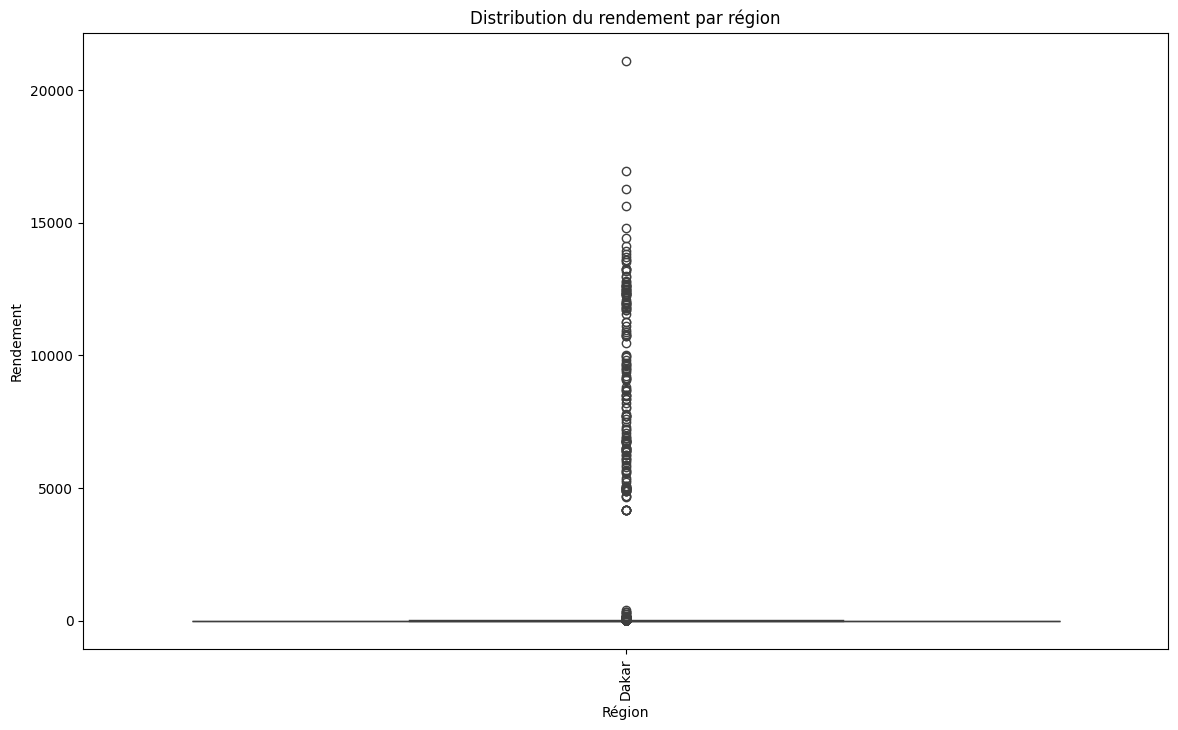

In [12]:
# Boxplot du Rendement par Région
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='State', y='Yield')
plt.xticks(rotation=90)
plt.title("Distribution du rendement par région")
plt.xlabel("Région")
plt.ylabel("Rendement")
plt.show()


In [13]:
# Sélection des features et de la target
# On suppose que la colonne 'Yield' est la variable cible (target) et les autres colonnes sont des caractéristiques
X = data.drop(columns=['Yield'])
y = data['Yield']

In [14]:
# Gestion des variables catégorielles avec get_dummies (encodage)
X = pd.get_dummies(X, drop_first=True)

In [15]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialiser le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
# Entraîner le modèle
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

In [19]:
# Calcul du R²
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R²) : {r2}")

Coefficient de détermination (R²) : 0.9845402958999581


In [20]:
# Évaluer le modèle avec la MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE du modèle : {rmse}")


RMSE du modèle : 110.43823830817665


In [10]:
# Sauvegarder le modèle entraîné
joblib.dump(model, 'C:\Users\WANE\Desktop\Mémoire Agriculture\project-root\crop_yield_model.pkl')

In [ ]:
# Charger le modèle
model = joblib.load('C:\Users\WANE\Desktop\Mémoire Agriculture\project-root\crop_yield_model.pkl')

In [10]:
joblib.dump(X_train.columns, 'C:\Users\WANE\Desktop\Mémoire Agriculture\project-root\X_train_columns.pkl')

['X_train_columns.pkl']